In [1]:
# pip install pandas

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv("D:/ml project/housing data.csv")

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRARIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRARIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.275700,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.693805,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.198500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618250,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRARIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt


In [10]:
# housing.hist(bins = 50 ,figsize = (20,25))

## Train-Test spliting

In [11]:
# import numpy as np
# def split_train_test(data,test_ratio) :
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# train_set , test_set = split_train_test(housing, 0.2)
# print(f"rows in the train set : {len(train_set)}\nrows in test set : {len(test_set)}")

In [13]:
# pip install scikit-learn

In [14]:
from sklearn.model_selection import train_test_split
train_set , test_set=train_test_split(housing, test_size = 0.2,random_state = 42)
print(f"rows in the train set : {len(train_set)}\nrows in test set : {len(test_set)}")

rows in the train set : 404
rows in test set : 102


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits= 1, test_size = 0.2, random_state= 42)
for train_index, test_index in split.split(housing, housing["CHAS"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_train_set["CHAS"].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [17]:
strat_test_set["CHAS"].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [18]:
376/28

13.428571428571429

In [19]:
housing = strat_train_set.copy()

## CORelation Metric

In [20]:
corr_matric = housing.corr()

In [21]:
corr_matric["MEDV"].sort_values(ascending= False)

MEDV       1.000000
RM         0.671975
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRARIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

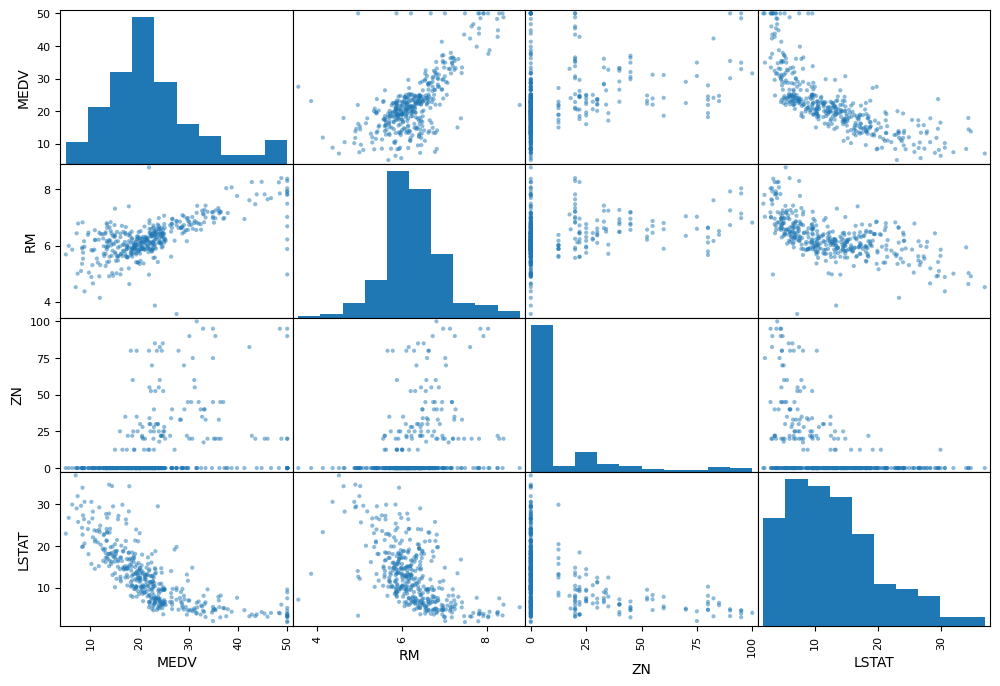

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM", "ZN" ,"LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='MEDV', ylabel='RM'>

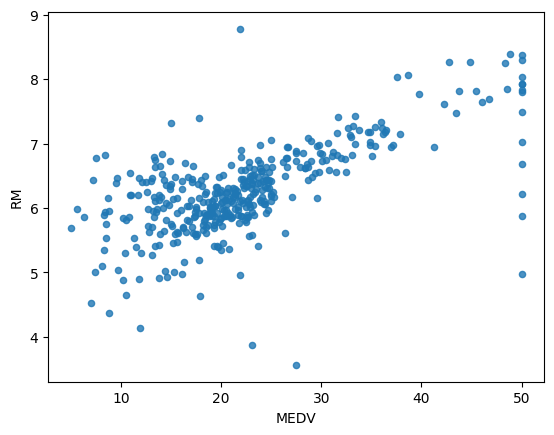

In [23]:
housing.plot(kind= "scatter", x = "MEDV", y = "RM",alpha = 0.8)

## Try Attributes  Combination

In [24]:
housing["TAXRM"] = housing["TAX"]/ housing["RM"]
housing["TAXRM"]


254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [25]:
corr_matric = housing.corr()
corr_matric["MEDV"].sort_values(ascending= False)

MEDV       1.000000
RM         0.671975
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRARIO   -0.493534
TAXRM     -0.524249
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

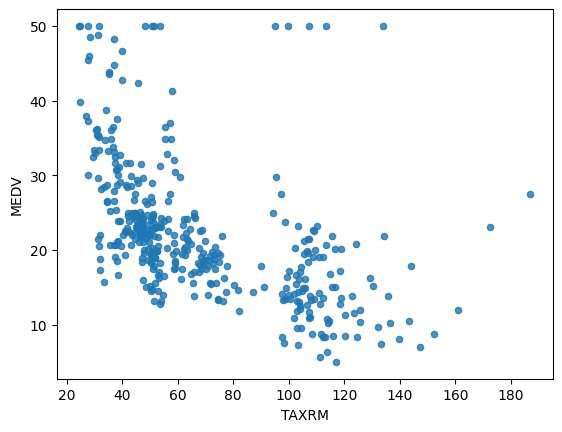

In [26]:
housing.plot(kind= "scatter", x = "TAXRM", y = "MEDV",alpha = 0.8)

In [27]:
housing = strat_train_set.drop("MEDV",axis =1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing attributes

In [28]:
median = housing['RM'].median()
median

6.209

In [29]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [30]:
housing.shape

(404, 13)

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing) 

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [33]:
X = imputer.transform(housing)

In [34]:
housing_tra = pd.DataFrame(X, columns = housing.columns)

In [35]:
housing_tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRARIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [36]:
## Scikit-learn Design 

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([("imputer" , SimpleImputer(strategy = "median")),("Std_scalar", StandardScaler()) ])

In [38]:
housing_num_tra = my_pipeline.fit_transform(housing_tra)
housing_num_tra.shape

(404, 13)

In [39]:
## Selection a desired model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
model = RandomForestRegressor()
# model = DecisionTreeRegressor()
model.fit(housing_num_tra, housing_labels)

RandomForestRegressor()

In [41]:
some_data = housing.iloc[:5]
some_label = housing_labels.iloc[0:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.478, 25.716, 16.544, 23.291, 23.651])

In [42]:
some_label

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [43]:
## Evaluate the model

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tra)
lin_mse = mean_squared_error(housing_labels,housing_prediction)
rmse = np.sqrt(lin_mse)

In [45]:
rmse

1.2750420173624089

In [46]:
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()
# model.fit(housing_num_tra, housing_labels)
    

In [47]:
# some_data = housing.iloc[:5]
# some_label = housing_labels.iloc[0:5]
# prepared_data = my_pipeline.transform(some_data)
# model.predict(prepared_data)

In [48]:
# from sklearn.metrics import mean_squared_error
# housing_prediction = model.predict(housing_num_tra)
# dec_mse = mean_squared_error(housing_labels,housing_prediction)
# d_rmse = np.sqrt(dec_mse)
# d_rmse

## Using better Evaluation Technique - Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tra, housing_labels, scoring = "neg_mean_squared_error")
rmse_score = np.sqrt(-scores)
rmse_score  

array([2.87097757, 3.44411921, 3.14896101, 4.93542158, 3.04770819])

In [50]:
def print_scores(scores1):
    print("Scores :" , scores1)
    print("Mean :" , scores1.mean())
    print("Standard deviation :", scores1.std())

print_scores(rmse_score)  

Scores : [2.87097757 3.44411921 3.14896101 4.93542158 3.04770819]
Mean : 3.4894375095639765
Standard deviation : 0.746520652531857


In [51]:
from joblib import dump, load
dump(model,"Dragon.joblib")

['Dragon.joblib']

## Tesing the model on test data

In [54]:
x_test = strat_test_set.drop("MEDV",axis = 1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_prediction = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [55]:
final_rmse

3.625845607930518

In [56]:
print(final_prediction,list(y_test))

[24.778 12.011 25.8   21.977 19.103 14.798 20.706 14.728 32.318 39.777
 19.827 11.824 24.857 21.824 19.625 11.502 31.19  14.408 23.644 18.686
 19.72  17.672 16.681 22.341 18.437 32.137 15.915 33.779  8.787 34.083
 24.506 21.214 23.082 11.468 21.186 10.851 40.83  24.15  24.051 42.121
 24.244 27.924 20.63  20.943 18.922 33.177 43.894 20.199 20.366 21.55
 21.049 14.374 21.786 15.063 25.334 32.665 40.991 29.587 19.424 21.172
 29.205  9.473 18.697 25.253 14.931 33.291 20.094 17.828 19.237 34.714
 30.744 23.085 21.264 22.608 35.275 12.229 15.961 20.006 20.943 21.694
 22.866 21.425 14.753 23.132 20.586 21.376 14.365 21.191 22.195 23.094
 18.804 27.19   7.056 26.006 19.135 22.839 19.451 31.108 13.988 27.364
 21.048 20.688] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [75]:
a = prepared_data[0]
a = np.array([[-0.43942006,  4.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23600024, -2.31238772,  4.61111401, -1.0016859 , -0.5778192 ,
       -1.97491834,  0.41164221, -0.86091034]])

In [76]:
model = load("Dragon.joblib")
model.predict(a)

array([22.513])